Iteration 0: vk = [ 0.18828893  0.01106215  0.5043709   0.37628721  0.1329287   0.09116549
 -0.3153414   0.33173843  0.45386437  0.35634001], Lk = 1.647124346313702, Mk = 4.941373038941106, Loss = 14852.380816386849
Iteration 1: vk = [ 0.24689955 -0.08635344  0.84119191  0.60036218  0.14265356  0.06411896
 -0.48574811  0.51642717  0.74613693  0.56276778], Lk = 1.8696652043726047, Mk = 5.6089956131178145, Loss = 14850.418159290268
Iteration 2: vk = [ 0.29818795  0.01580243  1.13634927  0.79668567  0.15102051  0.0402503
 -0.63501252  0.67816027  1.00220778  0.74358103], Lk = 2.131577970325028, Mk = 6.394733910975084, Loss = 14848.608762682119
Iteration 3: vk = [ 0.343365   -0.05977936  1.39671271  0.96983023  0.15828008  0.01905843
 -0.76661251  0.8207248   1.22804983  0.90300888], Lk = 2.414424765272574, Mk = 7.243274295817722, Loss = 14847.087025217505
Iteration 4: vk = [ 3.82996431e-01  1.93635875e-02  1.62536552e+00  1.12186639e+00
  1.64562581e-01  3.47067999e-04 -8.82146329e-01  9.

C:\Users\filip\AppData\Local\Temp\ipykernel_35996\1457715778.py:34: RuntimeWarning: overflow encountered in double_scalars
  Mk = np.linalg.norm(grad_vk) * Lk  # Compute Mk using the gradient norm


Iteration 5955: vk = [ 6.69868794e-001  6.59617094e-310  3.28835246e+000  2.22693186e+000
  2.07463387e-001  2.43885726e-309 -1.72109884e+000  1.85379460e+000
  2.86774263e+000  2.05943062e+000], Lk = inf, Mk = inf, Loss = 14835.846238459819
Iteration 5956: vk = [ 6.69868794e-001  6.59617094e-310  3.28835246e+000  2.22693186e+000
  2.07463387e-001  2.43885726e-309 -1.72109884e+000  1.85379460e+000
  2.86774263e+000  2.05943062e+000], Lk = inf, Mk = inf, Loss = 14835.846238459819
Iteration 5957: vk = [ 6.69868794e-001  6.59617094e-310  3.28835246e+000  2.22693186e+000
  2.07463387e-001  2.43885726e-309 -1.72109884e+000  1.85379460e+000
  2.86774263e+000  2.05943062e+000], Lk = inf, Mk = inf, Loss = 14835.846238459819
Iteration 5958: vk = [ 6.69868794e-001  6.59617094e-310  3.28835246e+000  2.22693186e+000
  2.07463387e-001  2.43885726e-309 -1.72109884e+000  1.85379460e+000
  2.86774263e+000  2.05943062e+000], Lk = inf, Mk = inf, Loss = 14835.846238459819
Iteration 5959: vk = [ 6.6986879

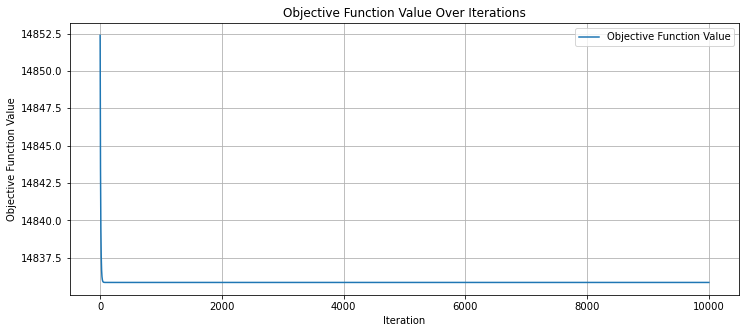

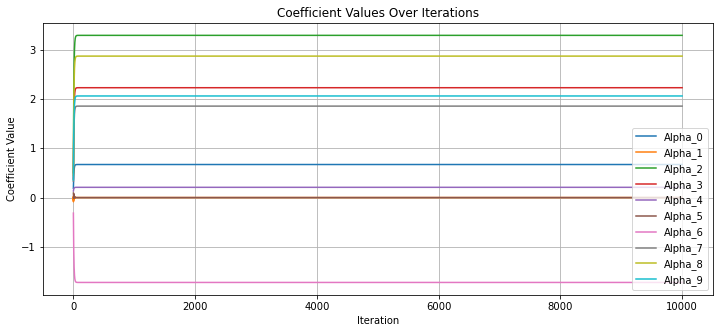

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

def lasso_objective(X, y, beta, lambda_):
    n = len(y)
    residual = y - np.dot(X, beta)
    loss = 0.5 * np.dot(residual, residual) / n
    penalty = lambda_ * np.linalg.norm(beta, ord=1)
    return loss + penalty

def lasso_gradient(X, y, beta, lambda_):
    n = len(y)
    residual = y - np.dot(X, beta)
    gradient_loss = -np.dot(X.T, residual) / n
    gradient_penalty = lambda_ * np.sign(beta)
    return gradient_loss + gradient_penalty

def dual_gradient_method(X, y, lambda_, L0, gamma_d=3, num_iterations=10000):
    n, p = X.shape
    vk = np.zeros(p)  # Start with zero coefficients
    Lk = L0
    Mk = None
    objective_values = []
    alpha_values = np.zeros((num_iterations, p))  # To store coefficient values over iterations

    for k in range(num_iterations):
        # Compute gradient at vk
        grad_vk = lasso_gradient(X, y, vk, lambda_)

        # Calculate Mk and update Lk
        Mk = np.linalg.norm(grad_vk) * Lk  # Compute Mk using the gradient norm
        Lk = max(L0, Mk / gamma_d)

        # Update vk using the gradient step
        vk = vk - (1 / Mk) * grad_vk

        # Capture objective and coefficient values for plotting
        current_loss = lasso_objective(X, y, vk, lambda_)
        objective_values.append(current_loss)
        alpha_values[k, :] = vk

        # Optionally output to observe convergence behavior
        print(f"Iteration {k}: vk = {vk}, Lk = {Lk}, Mk = {Mk}, Loss = {current_loss}")

    return vk, objective_values, alpha_values

# Load the diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set regularization strength
lambda_ = 0.6
L0 = 1.0  # Initial estimate for L0

# Run the Dual Gradient Method
beta, objective_values, alpha_values = dual_gradient_method(X_train, y_train, lambda_, L0)

# Evaluate the model
predictions = X_test.dot(beta)
mse = mean_squared_error(y_test, predictions)

# Display results
print("Mean Squared Error on Test Set:", mse)
print("Model coefficients:", beta)

# Plot objective function values
plt.figure(figsize=(12, 5))
plt.plot(objective_values, label='Objective Function Value')
plt.title('Objective Function Value Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the alpha coefficients over iterations
plt.figure(figsize=(12, 5))
for i in range(X_train.shape[1]):
    plt.plot(alpha_values[:, i], label=f'Alpha_{i}')
plt.title('Coefficient Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Coefficient Value')
plt.legend()
plt.grid(True)
plt.show()
